<hr>
Mariana Valencia Cubillos <br>
1027660277
<hr>

# <center>Examen Parcial</center>
##  VISIÓN ARTIFICIAL (3009550)
### 2022-2


In [1]:
## Importar las librerías necesarias
%matplotlib inline 
#Magic para mostrar imágenes en Jupyter usando matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import warnings
warnings.filterwarnings('ignore')
import skimage
import skimage.io
import skimage.morphology as morph

## Preguntas:
### 1. ¿Cómo se podría eliminar el ruido de la siguiente imagen? <br>
El ruido de las imagenes se puede disminuir haciendo uso de diferentes funciones. Algunas de ellas pueden ser funciones como blur, medianblur. Sin embargo con otras opeaciones como bilateral funciona mucho mejor. Esto pasa debido al tipo de ruido que hay.




In [40]:
def show_img(filename):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return plt.imshow(img)

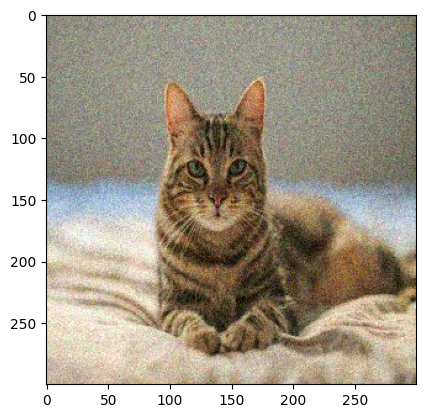

In [19]:
img_gatito = cv2.imread("res/gatito.jpg", cv2.IMREAD_COLOR)
img_gatito_rgb = cv2.cvtColor(img_gatito, cv2.COLOR_BGR2RGB)
plt.imshow(img_gatito_rgb)

Text(0.5, 1.0, 'Función medianBlur')

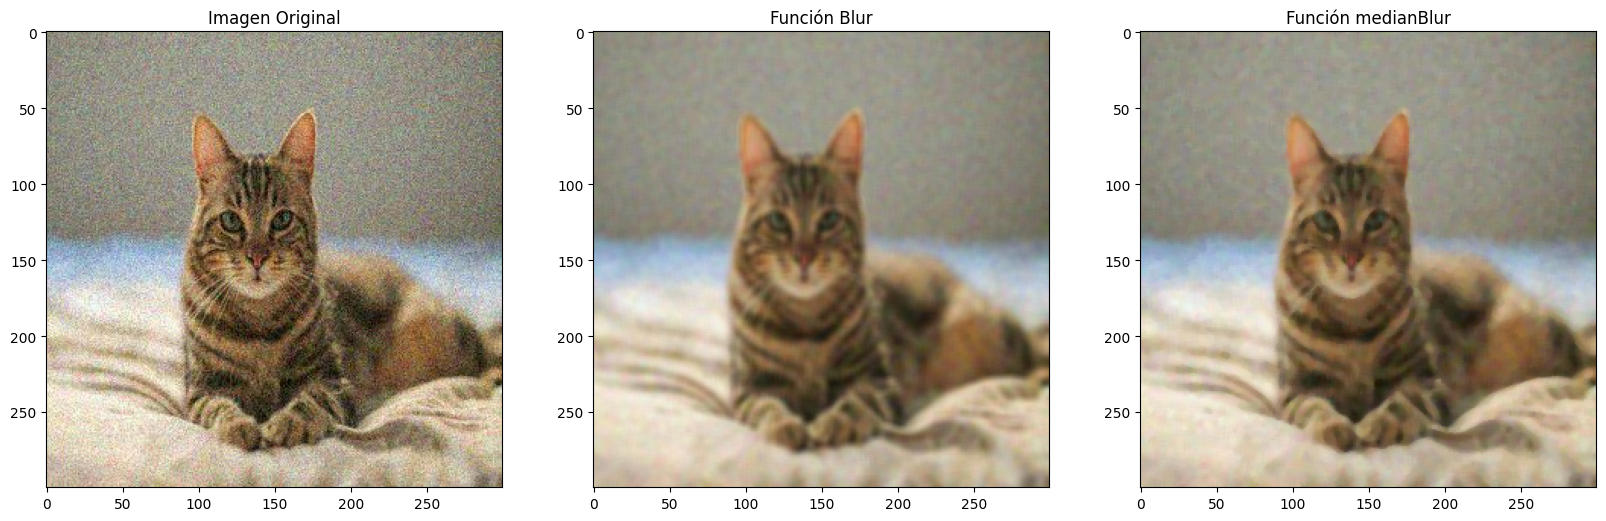

In [65]:
#Leer la imagen de entrada
img = cv2.cvtColor(img_gatito, cv2.COLOR_BGR2RGB)

#Dar valor al tamaño del kernel
k_size = 5

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse
res1 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )

res2 = cv2.medianBlur(img, k_size)

#Generar un subplot de 1x3 para mostrar imagen original, Blur y Filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.title("Función Blur")

plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.title("Función medianBlur")

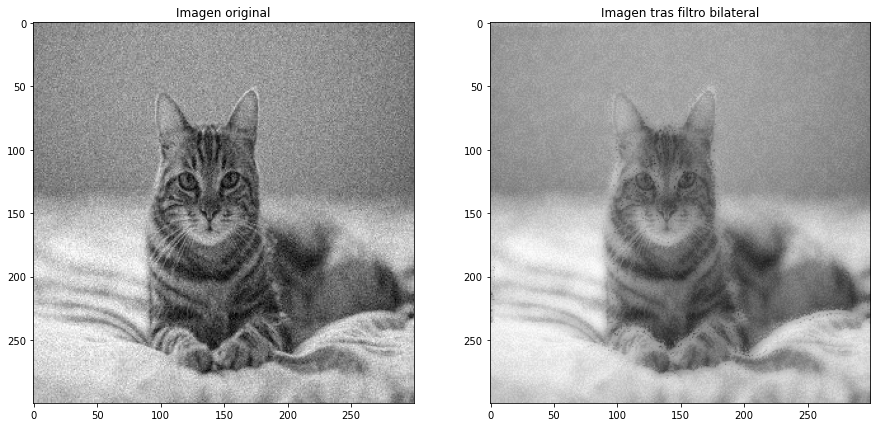

In [27]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None
    
###Implementación tomada de: https://github.com/anlcnydn/bilateral/blob/master/bilateral_filter.py

#Función distancia euclídea
def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)

#Distribución de probabilidad gaussiana
def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))

#Aplicar filtro bilateral a la entrada
def apply_bilateral_filter(source, filtered_image, x, y, diameter, sigma_i, sigma_s):
    #Operar con los parámetros de entrada
    hl = diameter//2
    i_filtered = 0
    Wp = 0
    #While hasta que i sea igual o mayor al diámetro definido
    i = 0
    #Operar sobre todos las posiciones i,j de la matriz de la imagen
    while i < diameter:
        j = 0
        while j < diameter:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            if neighbour_x >= len(source):
                neighbour_x -= len(source)
            if neighbour_y >= len(source[0]):
                neighbour_y -= len(source[0])
            #Aplicar la distribución gaussiana a los resultados obtenidos
            gi = gaussian(source[neighbour_x][neighbour_y] - source[x][y], sigma_i)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            #Obtener el valor Wp que se muestra arriba
            w = gi * gs
            i_filtered += source[neighbour_x][neighbour_y] * w
            Wp += w
            j += 1
        i += 1
    #Finalmente, la imagen filtrada BF
    i_filtered = i_filtered / Wp
    filtered_image[x][y] = int(round(i_filtered))

#Función filtro bilateral
def bilateral_filter(source, filter_diameter, sigma_i, sigma_s):
    #Crear la imagen como matriz de ceros del tamaño de la imagen de entrada
    filtered_image = np.zeros(source.shape)
    #Ciclo que opera sobre las posiciones i,j de la imagen creada y la imagen de entrada
    i = 0
    while i < len(source):
        j = 0
        while j < len(source[0]):
            #Aplicar filtro bilateral a la imagen de entrada enm cada posición i,j
            apply_bilateral_filter(source, filtered_image, i, j, filter_diameter, sigma_i, sigma_s)
            j += 1
        i += 1
    return filtered_image

#Leer la imagen de entrada
img = img_read("res/gatito.jpg", 'gray')

#Tamaño del kernel
k_size = 9

#Filtro bilateral sobre la imagen de entrada
res = bilateral_filter(img,k_size,75, 75)

#Tipo de dato uint8
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro bilateral
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro bilateral')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

### 2. ¿Cómo obtener una máscara que contenga los siguientes objetos?
Teniendo en cuenta que la imagen solo tiene 2 colores y uno de ellos es el blanco, se puede pasar a escala de grises. Y asi, se puede realizar un histograma de la imagen a blanco y negro y visualizar de manera mas clara que el umbral es menor a el "blanco" del fomdo. Yo escogi el 220, asi se puede pasar esa imagen a binario y obtener una mascara que solo contenga las reglas.

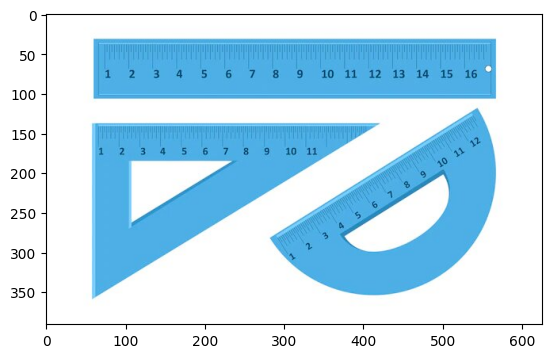

In [42]:
show_img('res/objetos.jpg')

In [48]:
def hist(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    #Generar subplot 1x2  que muestre imagen e histograma
    fig, ax = plt.subplots(1,2, figsize=(15, 8))
    ax[0].set_title('Imagen Escala de grises')
    ax[0].imshow(img, cmap='gray')
    ax[1].set_title('Histograma')
    ax[1].hist(img.ravel())
    return fig, ax

(<Figure size 1500x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Imagen Escala de grises'}>,
        <AxesSubplot:title={'center':'Histograma'}>], dtype=object))

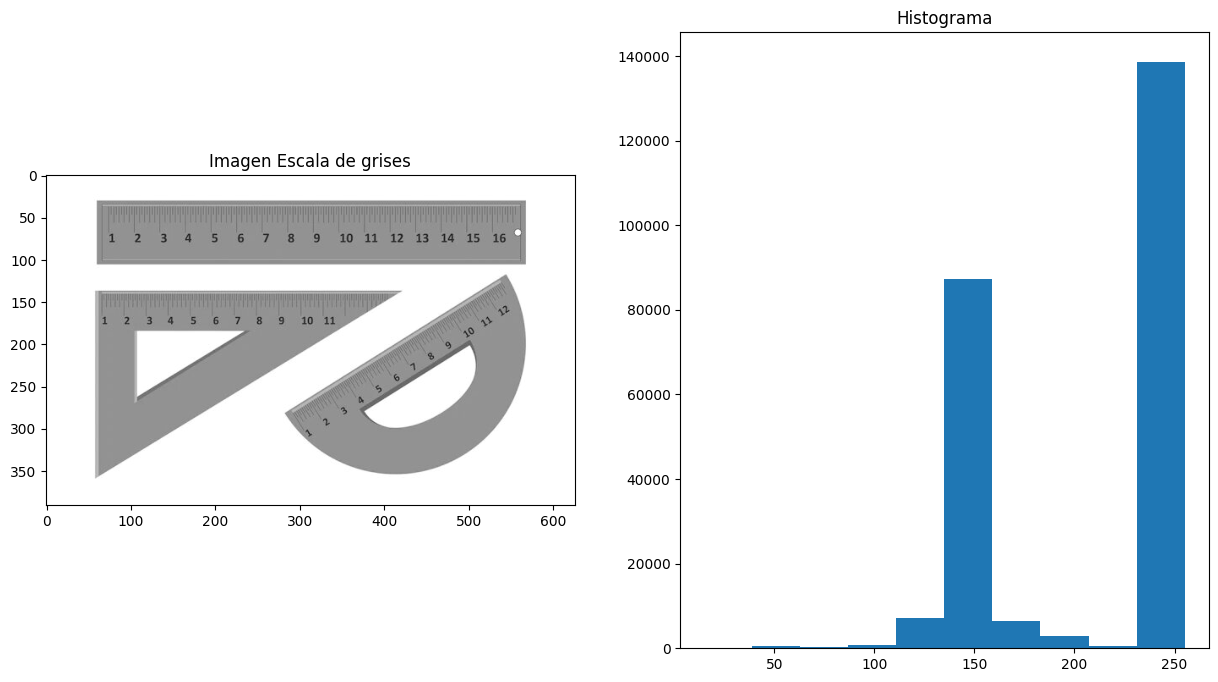

In [49]:
hist('res/objetos.jpg')

In [54]:
def mask(filename, val):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
    
    return plt.imshow(thresh2, cmap='gray')

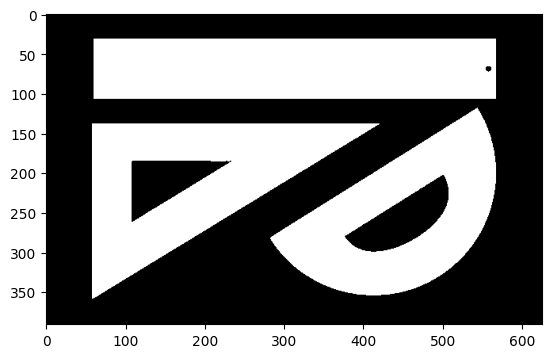

In [55]:
mask('res/objetos.jpg', 220)

In [57]:
def mask(filename, val):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
    
    return thresh2

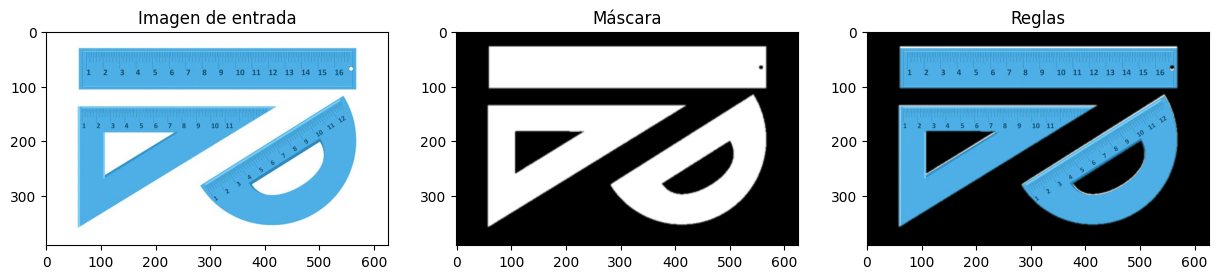

In [61]:
##Uso de la Mascara##

#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/objetos.jpg'), cv2.COLOR_BGR2RGB)
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mask.jpg')/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))

#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = img * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Reglas')
ax1.imshow(img, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')



### 3. Del resultado anterior, mediante morfología, responda la siguiente pregunta, ¿Cómo puede separar la regla de los otros objetos?

La mejor manera de hacerlo es usando la mascara del punto anterior y tantear hasta a donde llega la regla. Lo otro podemos ponerlo en negro usando el canal y asi obtenemos solo la regla horizontal.

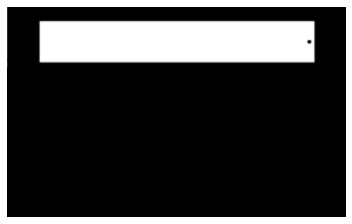

In [19]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

def show_image(img):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img, cmap='gray')
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

img_mask = skimage.io.imread('./res/mask.jpg', as_gray=True)

img_mask[180:, :] = 0  

show_image(img_mask)

## 4. Problema Parcial. 

### 1. Adquisición de Imágenes <br>
Usare la imagen 3 de las manzanas. 

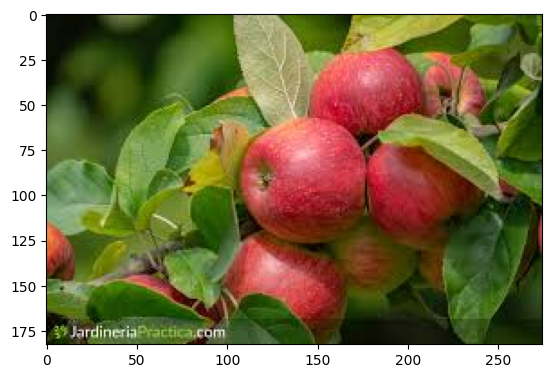

In [76]:
show_img('res/3.jpg')

In [19]:
def espacio_color(filename):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_R = img_rgb[:,:,0]
    img_G = img_rgb[:,:,1]
    img_B = img_rgb[:,:,2]
    
    img_L = img_lab[:,:,0]
    img_A = img_lab[:,:,1]
    img_B = img_lab[:,:,2]

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    img_H = img_hsv[:,:,0]
    img_S = img_hsv[:,:,1]
    img_V = img_hsv[:,:,2]

    img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
    img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
    img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

    #Mostrar y comparar imágenes
    fig, arreglo_plots = plt.subplots(4,3, figsize=(15, 20))
    arreglo_plots[0,0].set_title('RGB, LAB, HSL y YIQ')
    
    arreglo_plots[0,0].set_title('Canal R del RGB')
    arreglo_plots[0,0].imshow(img_R, cmap='gray')
    arreglo_plots[0,1].set_title('Canal G del RGB')
    arreglo_plots[0,1].imshow(img_G, cmap='gray')
    arreglo_plots[0,2].set_title('Canal B del RGB')
    arreglo_plots[0,2].imshow(img_B, cmap='gray')
    
    arreglo_plots[1,0].set_title('Canal L del LAB')
    arreglo_plots[1,0].imshow(img_L, cmap='gray')
    arreglo_plots[1,1].set_title('Canal A del LAB')
    arreglo_plots[1,1].imshow(img_A, cmap='gray')
    arreglo_plots[1,2].set_title('Canal B del LAB')
    arreglo_plots[1,2].imshow(img_B, cmap='gray')
    
    arreglo_plots[2,0].set_title('Canal Matiz (Hue) del HSV')
    arreglo_plots[2,0].imshow(img_H, cmap='gray')
    arreglo_plots[2,1].set_title('Canal Saturación del HSV')
    arreglo_plots[2,1].imshow(img_S, cmap='gray')
    arreglo_plots[2,2].set_title('Canal Valor del HSV')
    arreglo_plots[2,2].imshow(img_V, cmap='gray')
    
    arreglo_plots[3,0].set_title('Canal Y del YIQ')
    arreglo_plots[3,0].imshow(img_Y, cmap='gray')
    arreglo_plots[3,1].set_title('Canal I del YIQ')
    arreglo_plots[3,1].imshow(img_I, cmap='gray')
    arreglo_plots[3,2].set_title('Canal Q del YIQ')
    arreglo_plots[3,2].imshow(img_Q, cmap='gray')

    return fig, arreglo_plots

(<Figure size 1500x2000 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'Canal R del RGB'}>,
         <AxesSubplot:title={'center':'Canal G del RGB'}>,
         <AxesSubplot:title={'center':'Canal B del RGB'}>],
        [<AxesSubplot:title={'center':'Canal L del LAB'}>,
         <AxesSubplot:title={'center':'Canal A del LAB'}>,
         <AxesSubplot:title={'center':'Canal B del LAB'}>],
        [<AxesSubplot:title={'center':'Canal Matiz (Hue) del HSV'}>,
         <AxesSubplot:title={'center':'Canal Saturación del HSV'}>,
         <AxesSubplot:title={'center':'Canal Valor del HSV'}>],
        [<AxesSubplot:title={'center':'Canal Y del YIQ'}>,
         <AxesSubplot:title={'center':'Canal I del YIQ'}>,
         <AxesSubplot:title={'center':'Canal Q del YIQ'}>]], dtype=object))

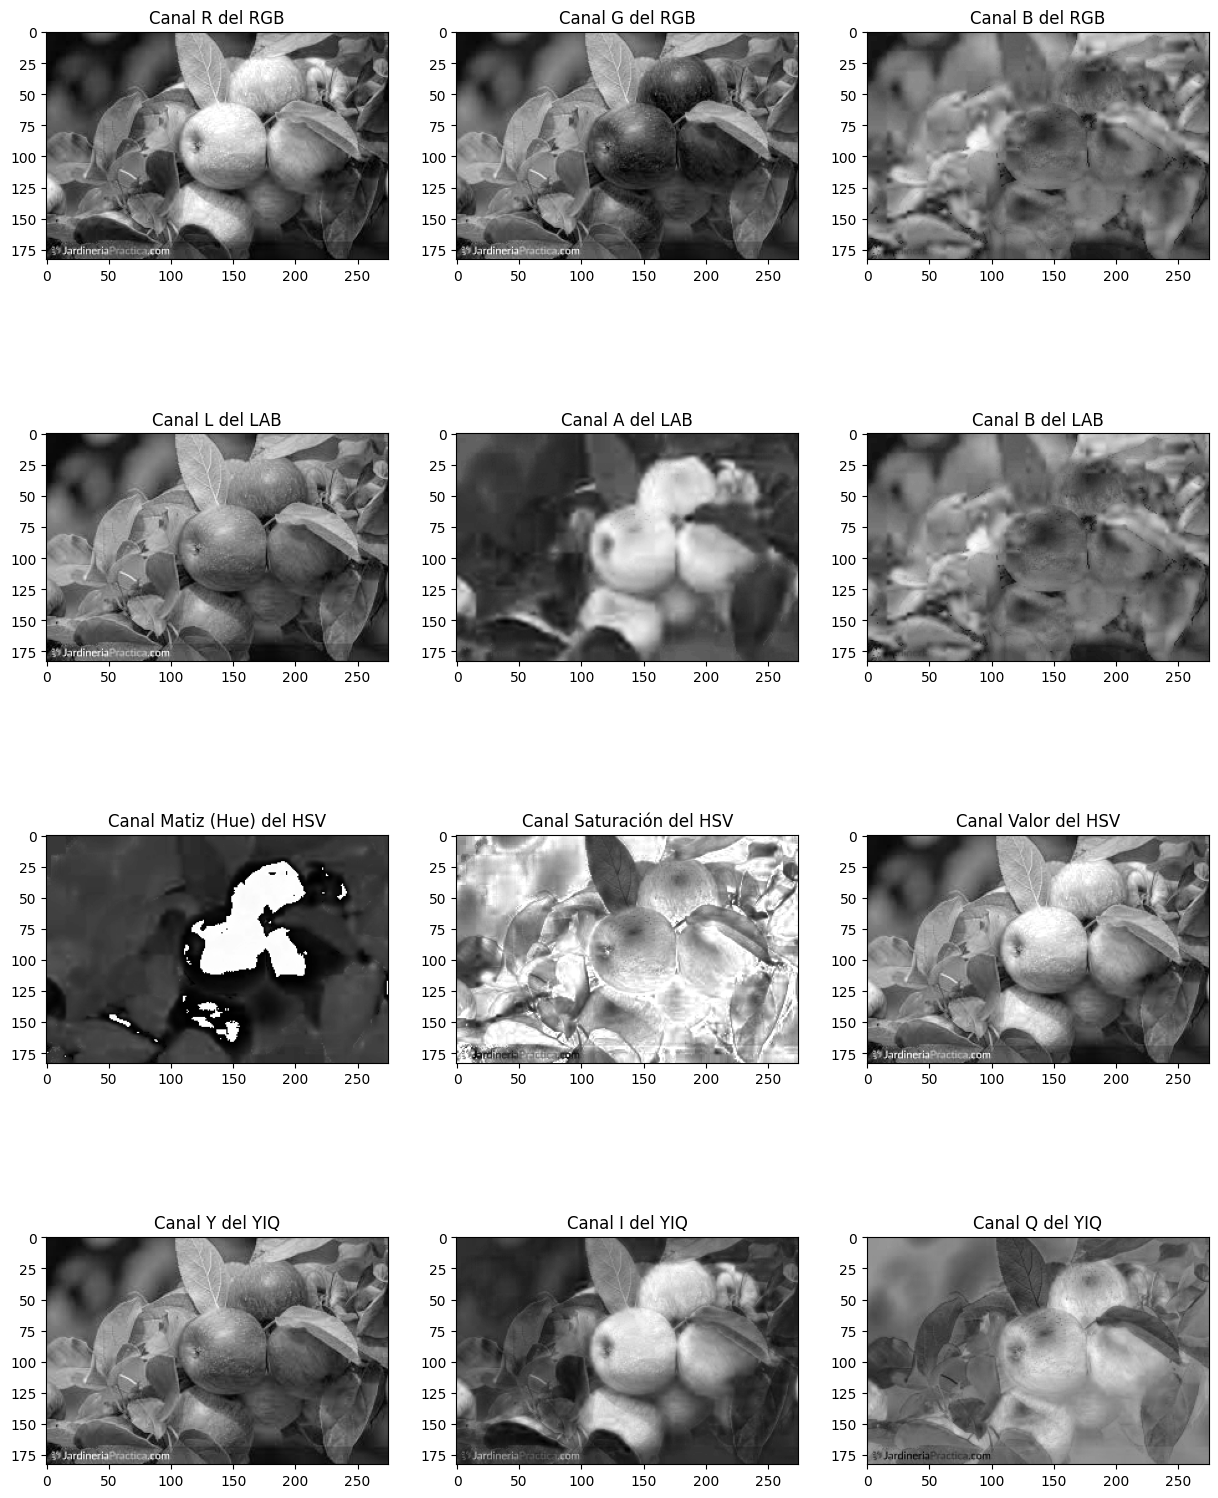

In [20]:
espacio_color('res/3.jpg')

## Elegir Canal <br>

<li> RGB: El R permitia separar muy sutilmente las manzanas, al igual que el b. Sin embargo esa sutileza no serviria mucho. El G, no proporciono ninguna informacion en cuanto al objeto de interes.
<li> LAB: los canales L y B mostraban la imagen en tonos bastante homogeneos. No servian. Por otro lado, el A separaba las manzanas de una manera notoria. Se veian muy claras respecto a el resto de la imagen, este canal seria un buen candidato.
<li> HSV: Tanto el canal H como el S separaban una parte de las manzanas, pero la otra parte estaba muy alejada en cuando a el tono de gris. El V no aporto informacion.
<li>YIQ: tanto el Y como el Q no resaltaban la manzana. Sin embargo el I separaba claramente las manzanas, sera tambien un buen candidato. <br>
Comparando el I del YIQ y el A del LAB, el A del lab proporciona un fondo mas oscuro que el I del YIQ. Esto se puede evidenciar en el gris claro de las hojas y el gris claro que hay en la manzana. Por ello, elijo del A del LAB. Separa de manera mas clara el ojeto de interes.

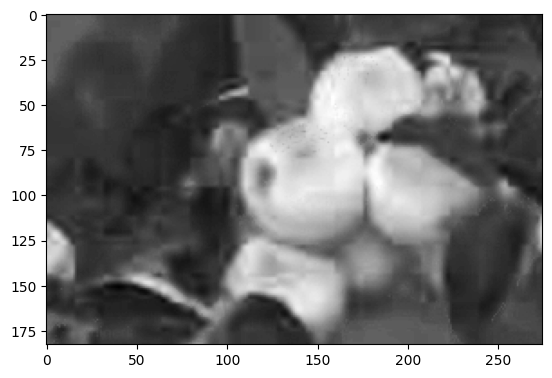

In [65]:
plt.imshow(img_A, cmap = 'gray')

### 2. Pre-Procesamiento <br>

Como la imagen se ve con un poco de ruido, vamos a usar alguna funcion para eliminarlo. Ademas, analizaremos los histograma para decidir que operacion vamos realizar.


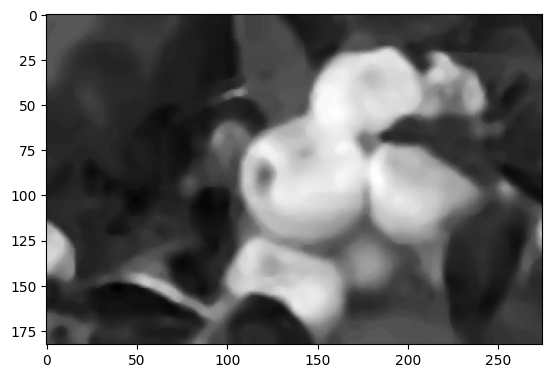

In [69]:
img_A = res2 = cv2.medianBlur(img_A, 5)
plt.imshow(img_A, cmap = 'gray')

(array([ 2905., 16621., 10966.,  5014.,  2330.,  1741.,  2181.,  3235.,
         3832.,  1500.]),
 array([ 89. ,  99.5, 110. , 120.5, 131. , 141.5, 152. , 162.5, 173. ,
        183.5, 194. ]),
 <BarContainer object of 10 artists>)

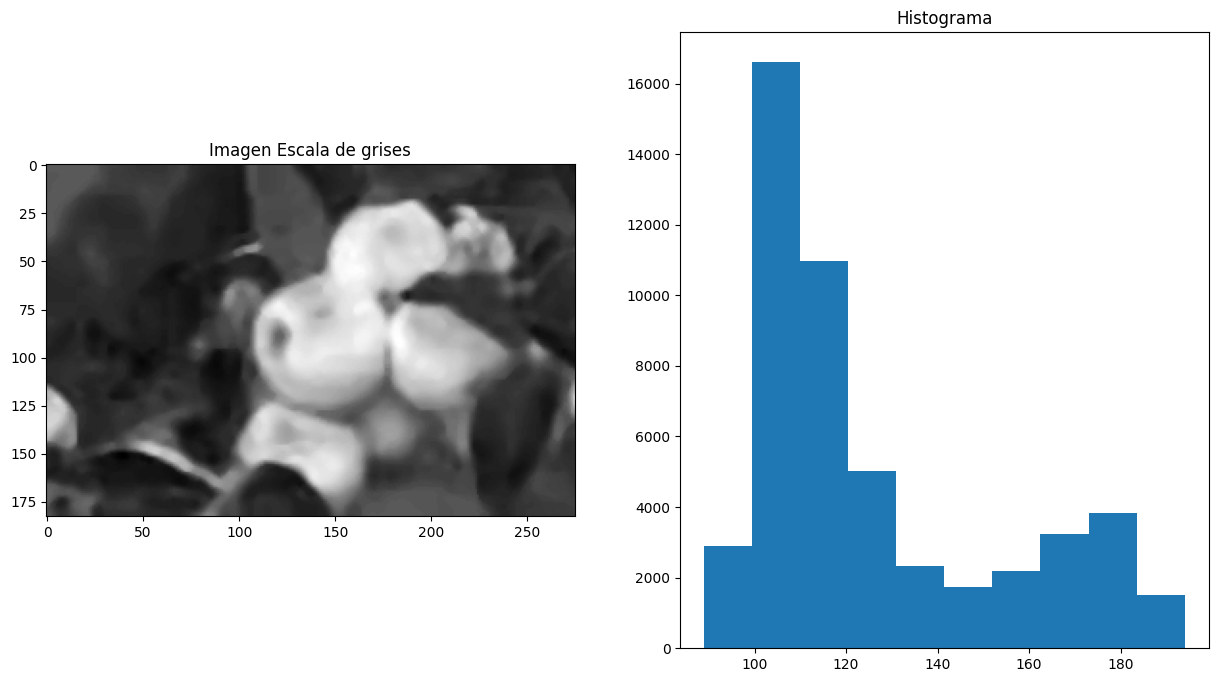

In [87]:
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)

fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Imagen Escala de grises')
ax[0].imshow(img_A, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img_A.ravel())

In [77]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res = f(img, *args)
    
    return res

#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res


def mult(r):

    img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    img_A = img_lab[:,:,1]
    img_A = res2 = cv2.medianBlur(img_A, 5)
    res = apply_f_on_rgb(img_A, histogram_expansion, [])

    #Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

    #Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
    arreglo_plots[0].set_title('Imagen Expandida')
    arreglo_plots[0].imshow(res, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    arreglo_plots[1].hist(res.ravel(), bins=255, range=(0.0, 256.0))

    return fig, arreglo_plots


(<Figure size 1500x1500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Imagen Expandida'}>,
        <AxesSubplot:title={'center':'Histograma'}>], dtype=object))

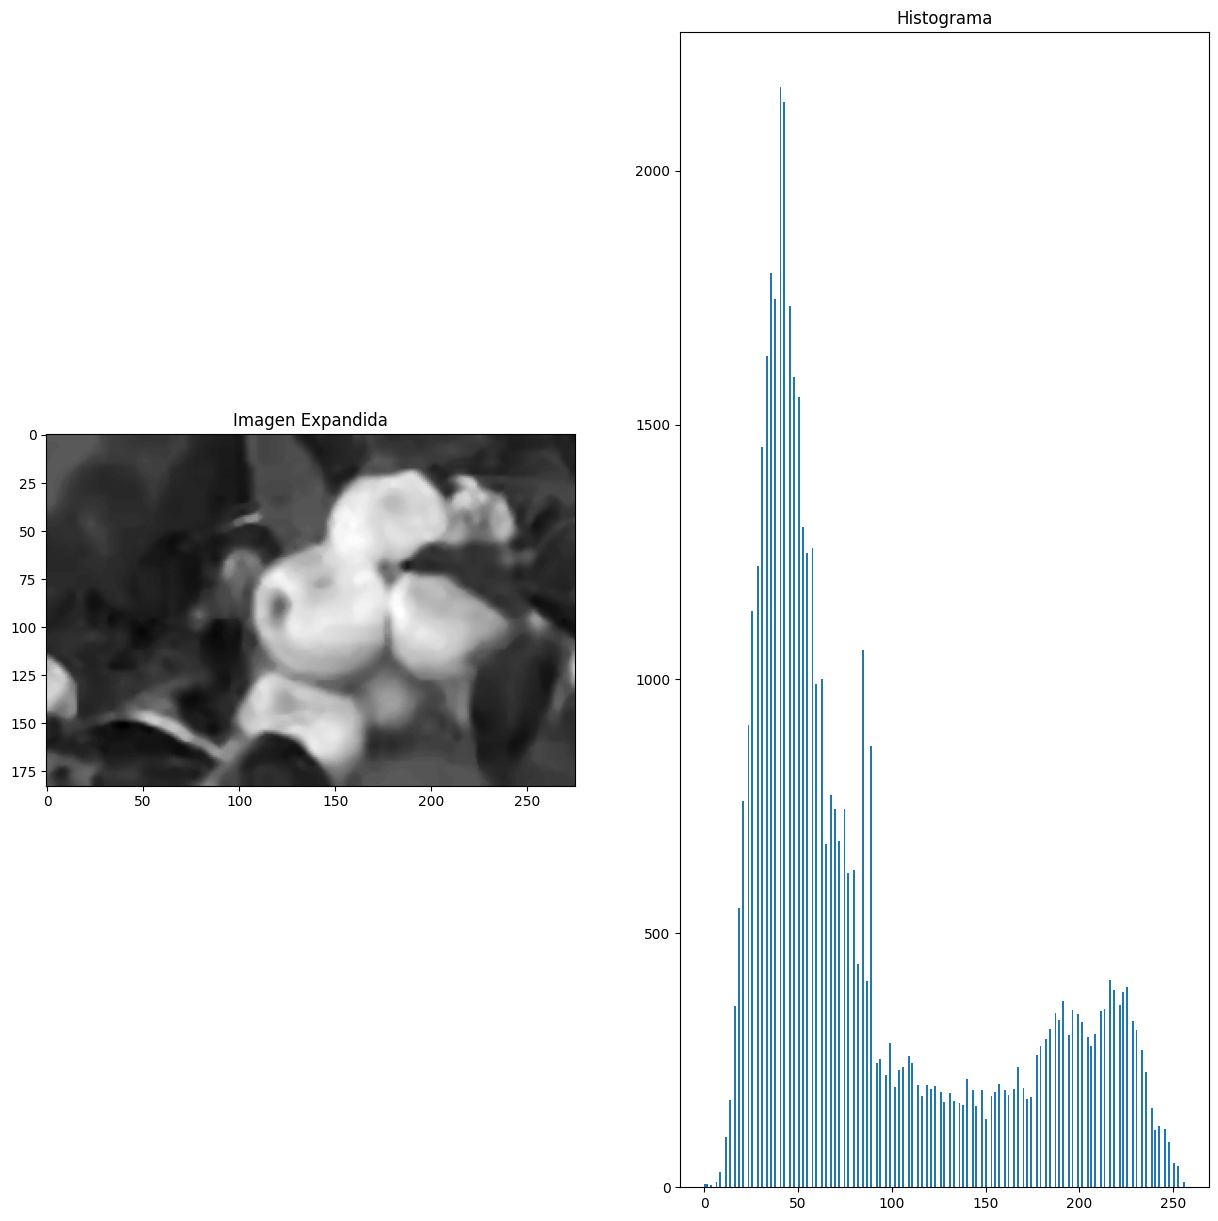

In [78]:
mult(5)

(<Figure size 1500x1500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Imagen Expandida'}>,
        <AxesSubplot:title={'center':'Histograma'}>], dtype=object))

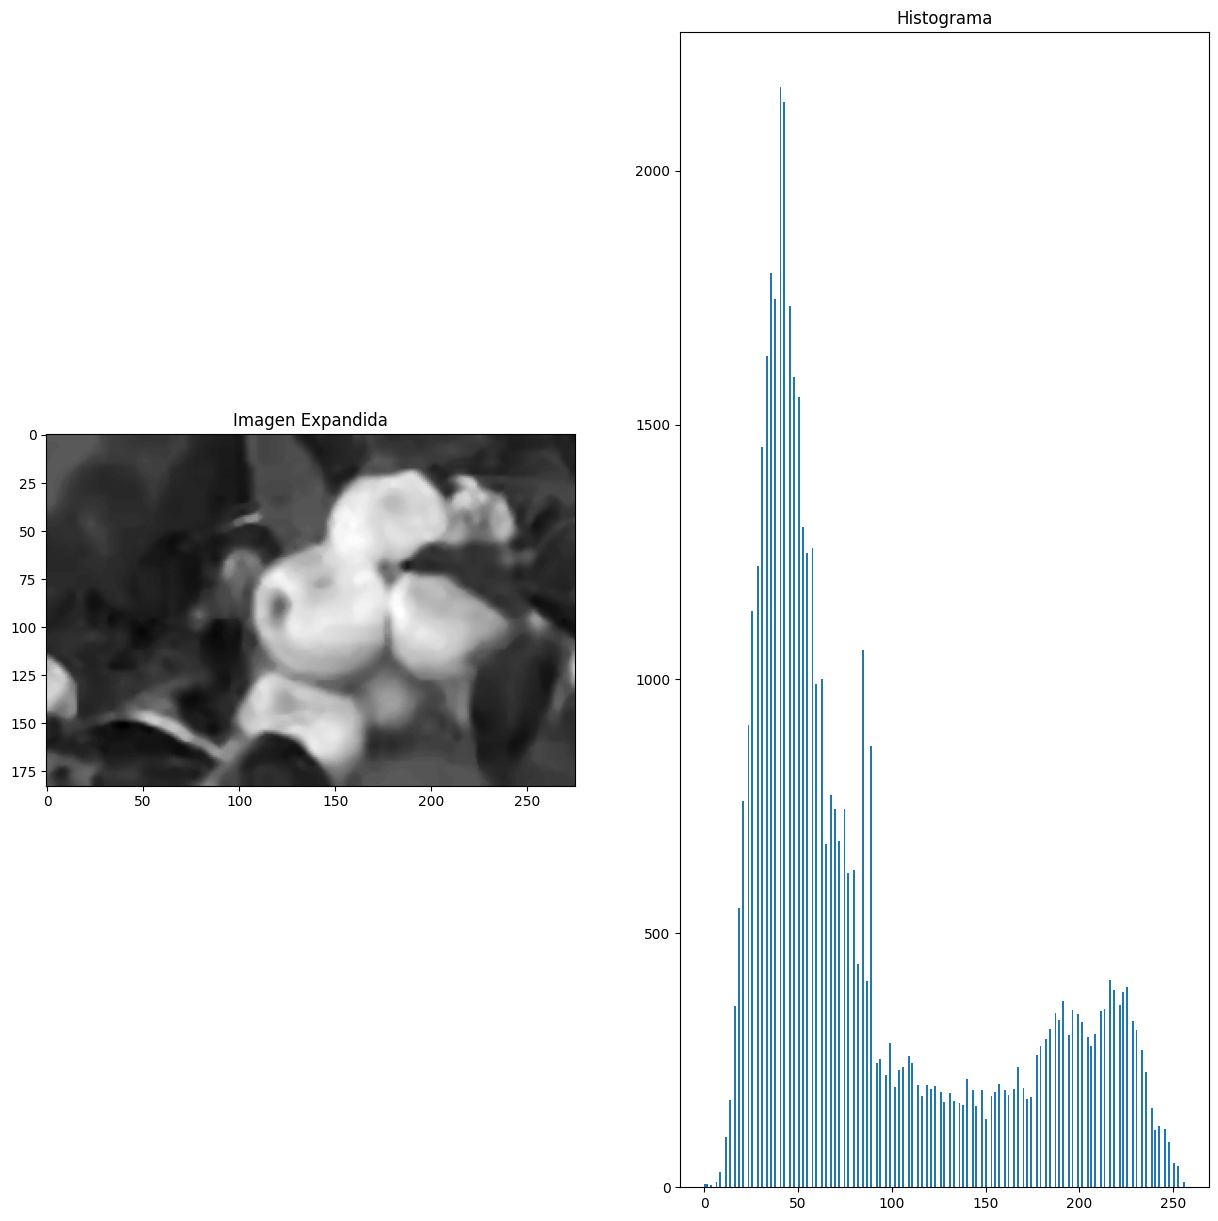

In [79]:
mult(10)

(<Figure size 1500x1500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Imagen Expandida'}>,
        <AxesSubplot:title={'center':'Histograma'}>], dtype=object))

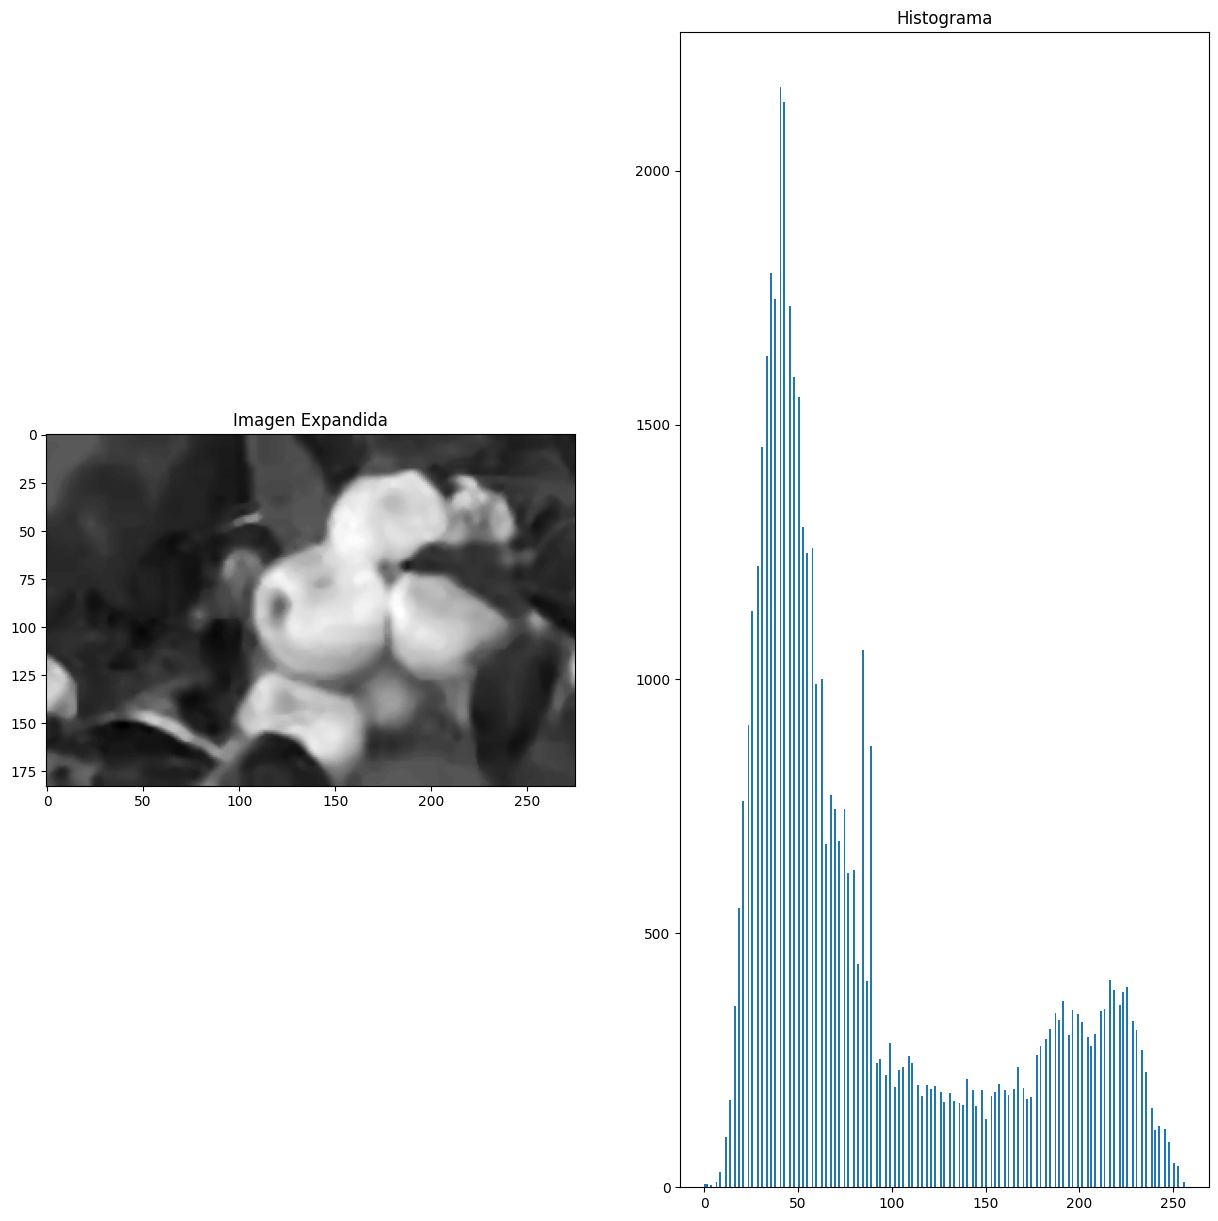

In [80]:
mult(20)

## Analizando los histogramas <br>

<li> Al elegir el canal, espere que cuando realizara el histograma se viera un valle claro. Pero este no fue el caso.
<li> A pesar de ello, en el canal A se puede ver que el fondo consiste en su mayoria, casi totalidad de tonos bastante oscuros. Por ello decidi realizar una expansion y hacer uso de estas caracteristicas.
<li> Expandi la imagen con varios y elegi una. Esta tenia un poco mas notoria la diferencia.    

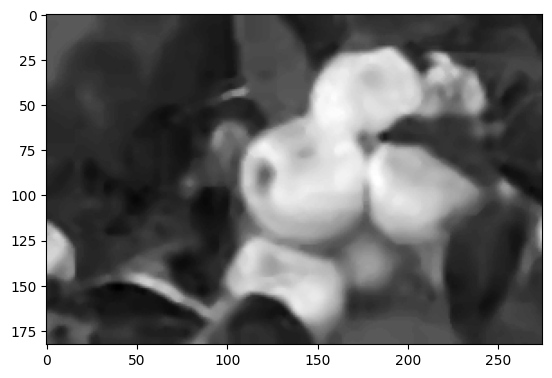

In [85]:
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

plt.imshow(img, cmap = 'gray')

## 3. Segmentación <br>
Como ya visualizamos un umbral, porque las manzanas estan de color claro (casi blanco), podemos realizar una umbralizacion para crear una mascara. Y con convolucion o erosion podemos eliminar las imperfecciones de la mascara.

In [88]:
def mask(val):
    ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
    
    return plt.imshow(thresh2, cmap='gray')

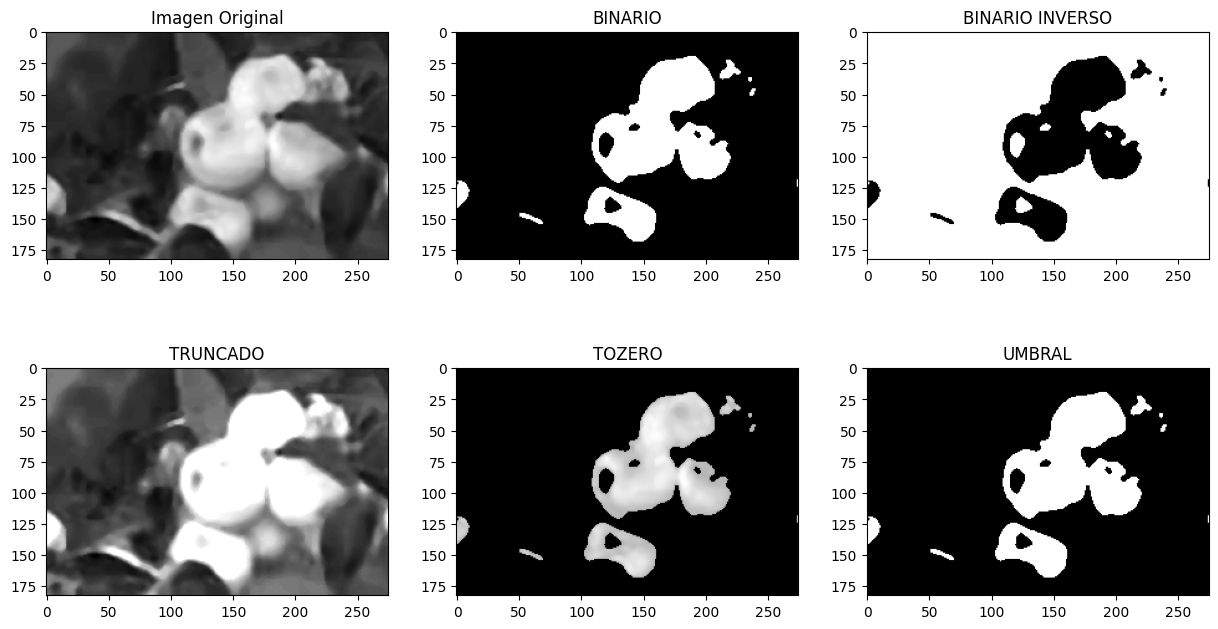

In [98]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Leer imagen de entrada
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

img = img.astype(np.uint8)

#Definir un valor mínimo
val = 180

#Generar mediante la función threshold de cv2, las distintas aproximaciones que 
#se ofrecen en la figura anterior
ret,thresh1 = cv2.threshold(img,val,145,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO)
umbre = img > val

#Dar título a las imágenes y hacer una lista de éstas
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, umbre]

#Generar un subplot 2x3 que muestre todas las umbralizaciones y la imagen original
fig, ax = plt.subplots(2,3, figsize=(15, 8))
ax[0][0].set_title('Imagen Original')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('BINARIO')
ax[0][1].imshow(thresh1, cmap='gray')
ax[0][2].set_title('BINARIO INVERSO')
ax[0][2].imshow(thresh2, cmap='gray')
ax[1][0].set_title('TRUNCADO')
ax[1][0].imshow(thresh3, cmap='gray')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][2].set_title('UMBRAL')
ax[1][2].imshow(umbre, cmap='gray')

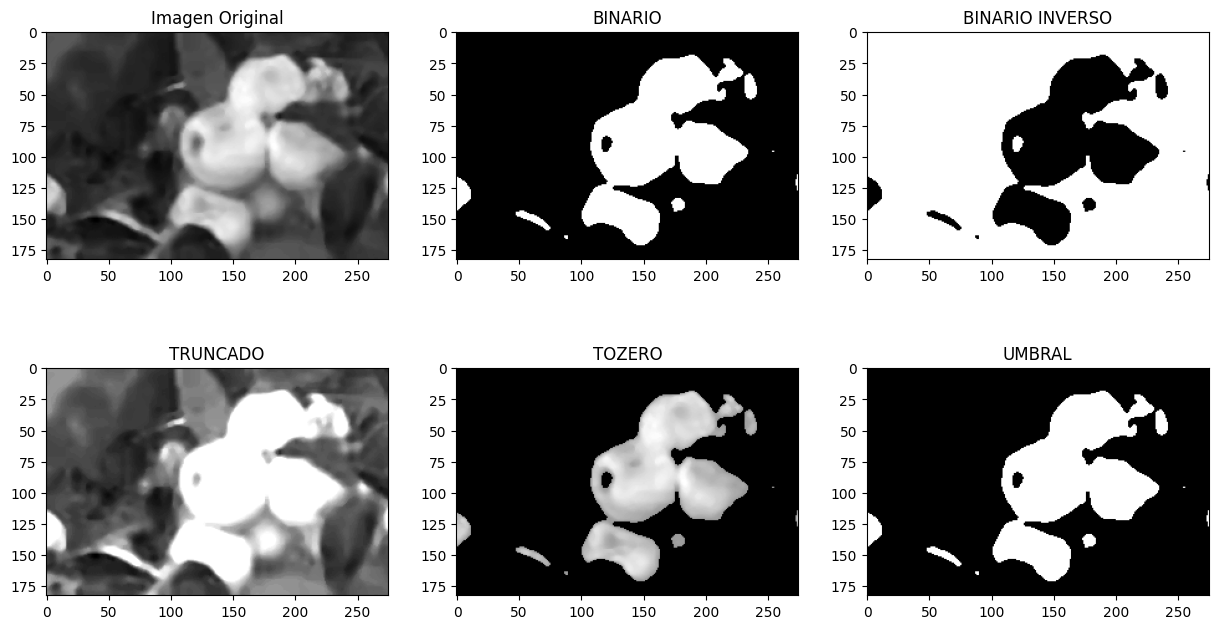

In [99]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Leer imagen de entrada
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

img = img.astype(np.uint8)

#Definir un valor mínimo
val = 150

#Generar mediante la función threshold de cv2, las distintas aproximaciones que 
#se ofrecen en la figura anterior
ret,thresh1 = cv2.threshold(img,val,145,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO)
umbre = img > val

#Dar título a las imágenes y hacer una lista de éstas
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, umbre]

#Generar un subplot 2x3 que muestre todas las umbralizaciones y la imagen original
fig, ax = plt.subplots(2,3, figsize=(15, 8))
ax[0][0].set_title('Imagen Original')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('BINARIO')
ax[0][1].imshow(thresh1, cmap='gray')
ax[0][2].set_title('BINARIO INVERSO')
ax[0][2].imshow(thresh2, cmap='gray')
ax[1][0].set_title('TRUNCADO')
ax[1][0].imshow(thresh3, cmap='gray')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][2].set_title('UMBRAL')
ax[1][2].imshow(umbre, cmap='gray')

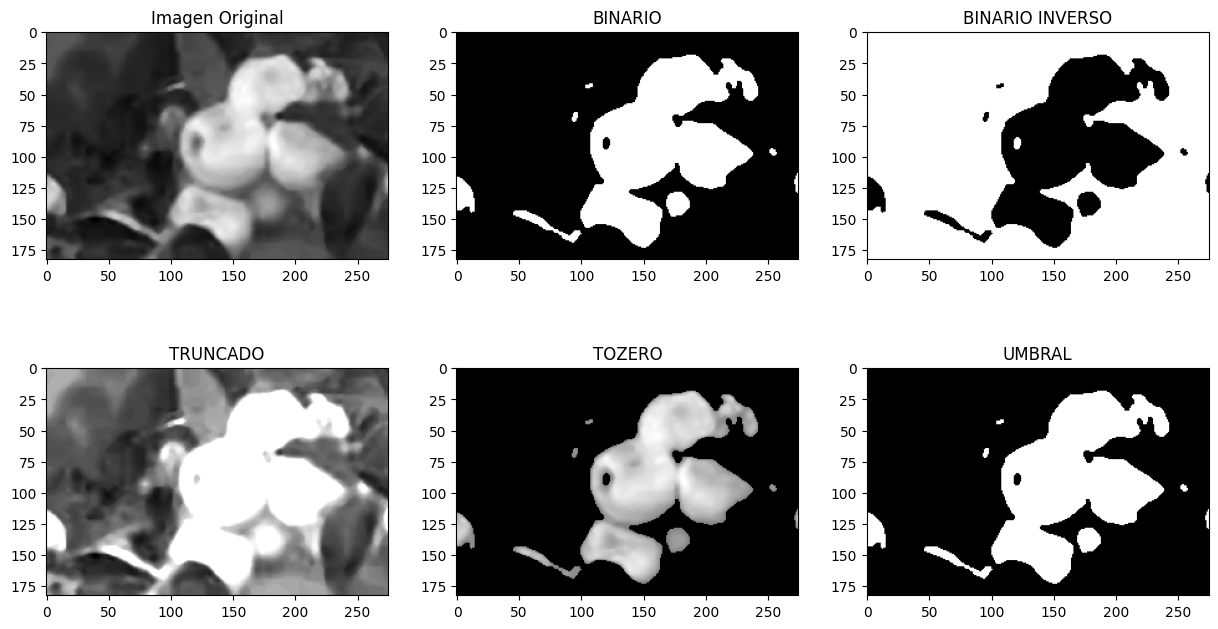

In [112]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Leer imagen de entrada
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

img = img.astype(np.uint8)

#Definir un valor mínimo
val = 130

#Generar mediante la función threshold de cv2, las distintas aproximaciones que 
#se ofrecen en la figura anterior
ret,thresh1 = cv2.threshold(img,val,145,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO)
umbre = img > val

#Dar título a las imágenes y hacer una lista de éstas
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, umbre]

#Generar un subplot 2x3 que muestre todas las umbralizaciones y la imagen original
fig, ax = plt.subplots(2,3, figsize=(15, 8))
ax[0][0].set_title('Imagen Original')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('BINARIO')
ax[0][1].imshow(thresh1, cmap='gray')
ax[0][2].set_title('BINARIO INVERSO')
ax[0][2].imshow(thresh2, cmap='gray')
ax[1][0].set_title('TRUNCADO')
ax[1][0].imshow(thresh3, cmap='gray')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][2].set_title('UMBRAL')
ax[1][2].imshow(umbre, cmap='gray')

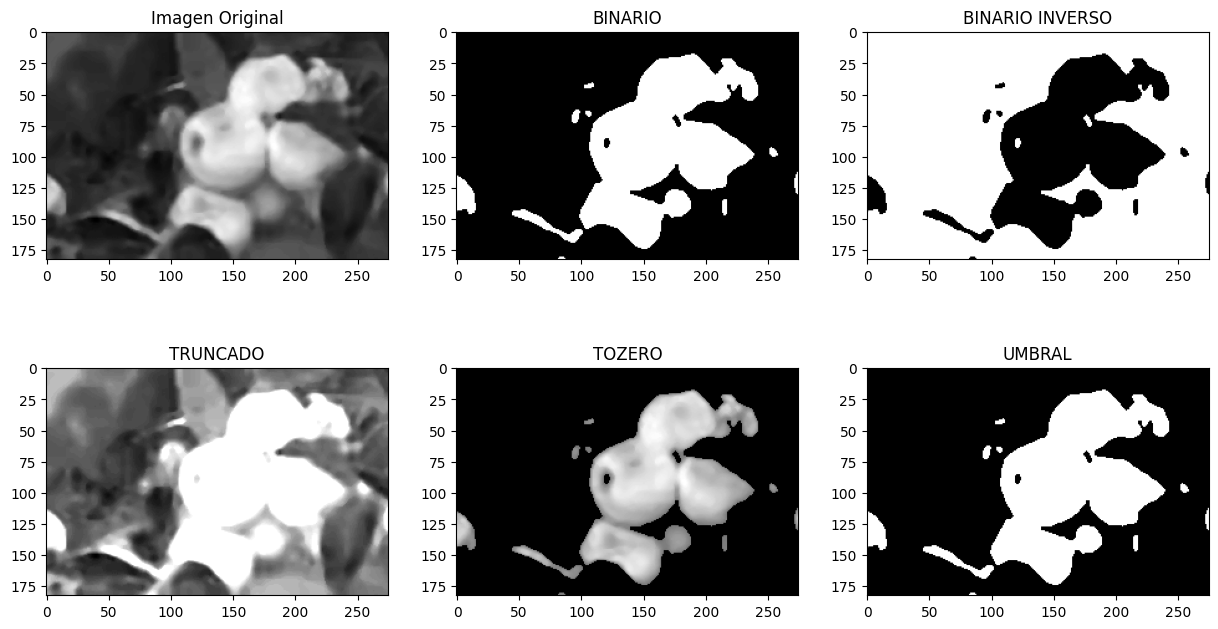

In [111]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Leer imagen de entrada
img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

img = img.astype(np.uint8)

#Definir un valor mínimo
val = 120

#Generar mediante la función threshold de cv2, las distintas aproximaciones que 
#se ofrecen en la figura anterior
ret,thresh1 = cv2.threshold(img,val,145,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO)
umbre = img > val

#Dar título a las imágenes y hacer una lista de éstas
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, umbre]

#Generar un subplot 2x3 que muestre todas las umbralizaciones y la imagen original
fig, ax = plt.subplots(2,3, figsize=(15, 8))
ax[0][0].set_title('Imagen Original')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('BINARIO')
ax[0][1].imshow(thresh1, cmap='gray')
ax[0][2].set_title('BINARIO INVERSO')
ax[0][2].imshow(thresh2, cmap='gray')
ax[1][0].set_title('TRUNCADO')
ax[1][0].imshow(thresh3, cmap='gray')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][2].set_title('UMBRAL')
ax[1][2].imshow(umbre, cmap='gray')

## Elegir Umbral

<li> Use varios umbrales y al hacerlo decidi que usaria 120 como umbral. La verdad esperaba un numero no tan bajo, pero debido a la concentracion de colores oscuros en el fondo esto dunciono.

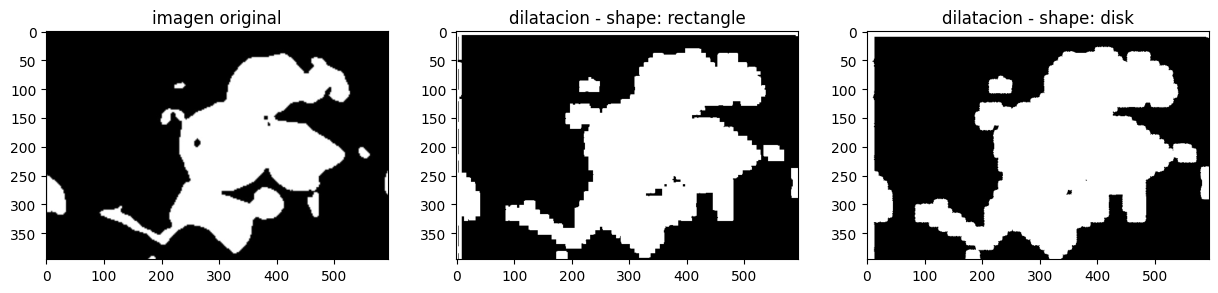

In [6]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear un rectángulo y un diso
elem1 = morph.rectangle(5,5)
#print(elem1)
elem2 = morph.disk(5)
#print(elem2)

#Leer la imagen de entrada
#mg = skimage.io.imread('./res/M6/imagen_ejemplo1.png', as_gray=True)
img = skimage.io.imread('./res/mascara.jpg', as_gray=True)

#Utilizar la función de dilatación binaria de skimage sobre la imagen de entrada,
#añadiendo píxeles con distintas máscaras
dilatacion1 = morph.binary_dilation(img,elem1)
dilatacion2 = morph.binary_dilation(img,elem2)

#Crear subplot 1x3 que muestre imagen original e imagenes dilatadas
fig, ax = plt.subplots(1,3, figsize=(15, 8))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('dilatacion - shape: rectangle')
ax[1].imshow(dilatacion1, cmap='gray')
ax[2].set_title('dilatacion - shape: disk')
ax[2].imshow(dilatacion2, cmap='gray')

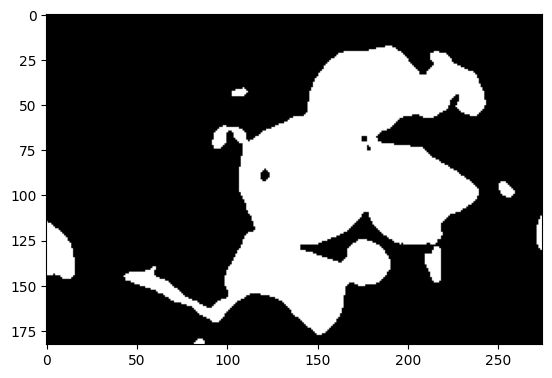

In [110]:
#Leer imagen de entrada

img = cv2.imread('res/3.jpg', cv2.IMREAD_COLOR)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_A = img_lab[:,:,1]
img_A = res2 = cv2.medianBlur(img_A, 5)
     
img = apply_f_on_rgb(img_A, histogram_expansion, [])

img = img.astype(np.uint8)

#Definir un valor mínimo
val = 110

ret,thresh1 = cv2.threshold(img,val,145,cv2.THRESH_BINARY)
mascara = thresh1
plt.imshow(mascara, cmap='gray')

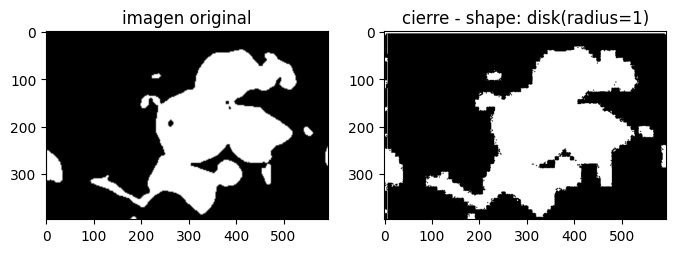

In [117]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear máscara
radius = 1
selem = morph.disk(radius)

#Leer imagen de entrada y aplicar la operación cierre de skimage, cuyos parámetros
#requieren imagen de entrada y una máscara
img = skimage.io.imread('./res/mascara.jpg', as_gray=True)
cierre = morph.binary_closing(img,selem)

#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray')


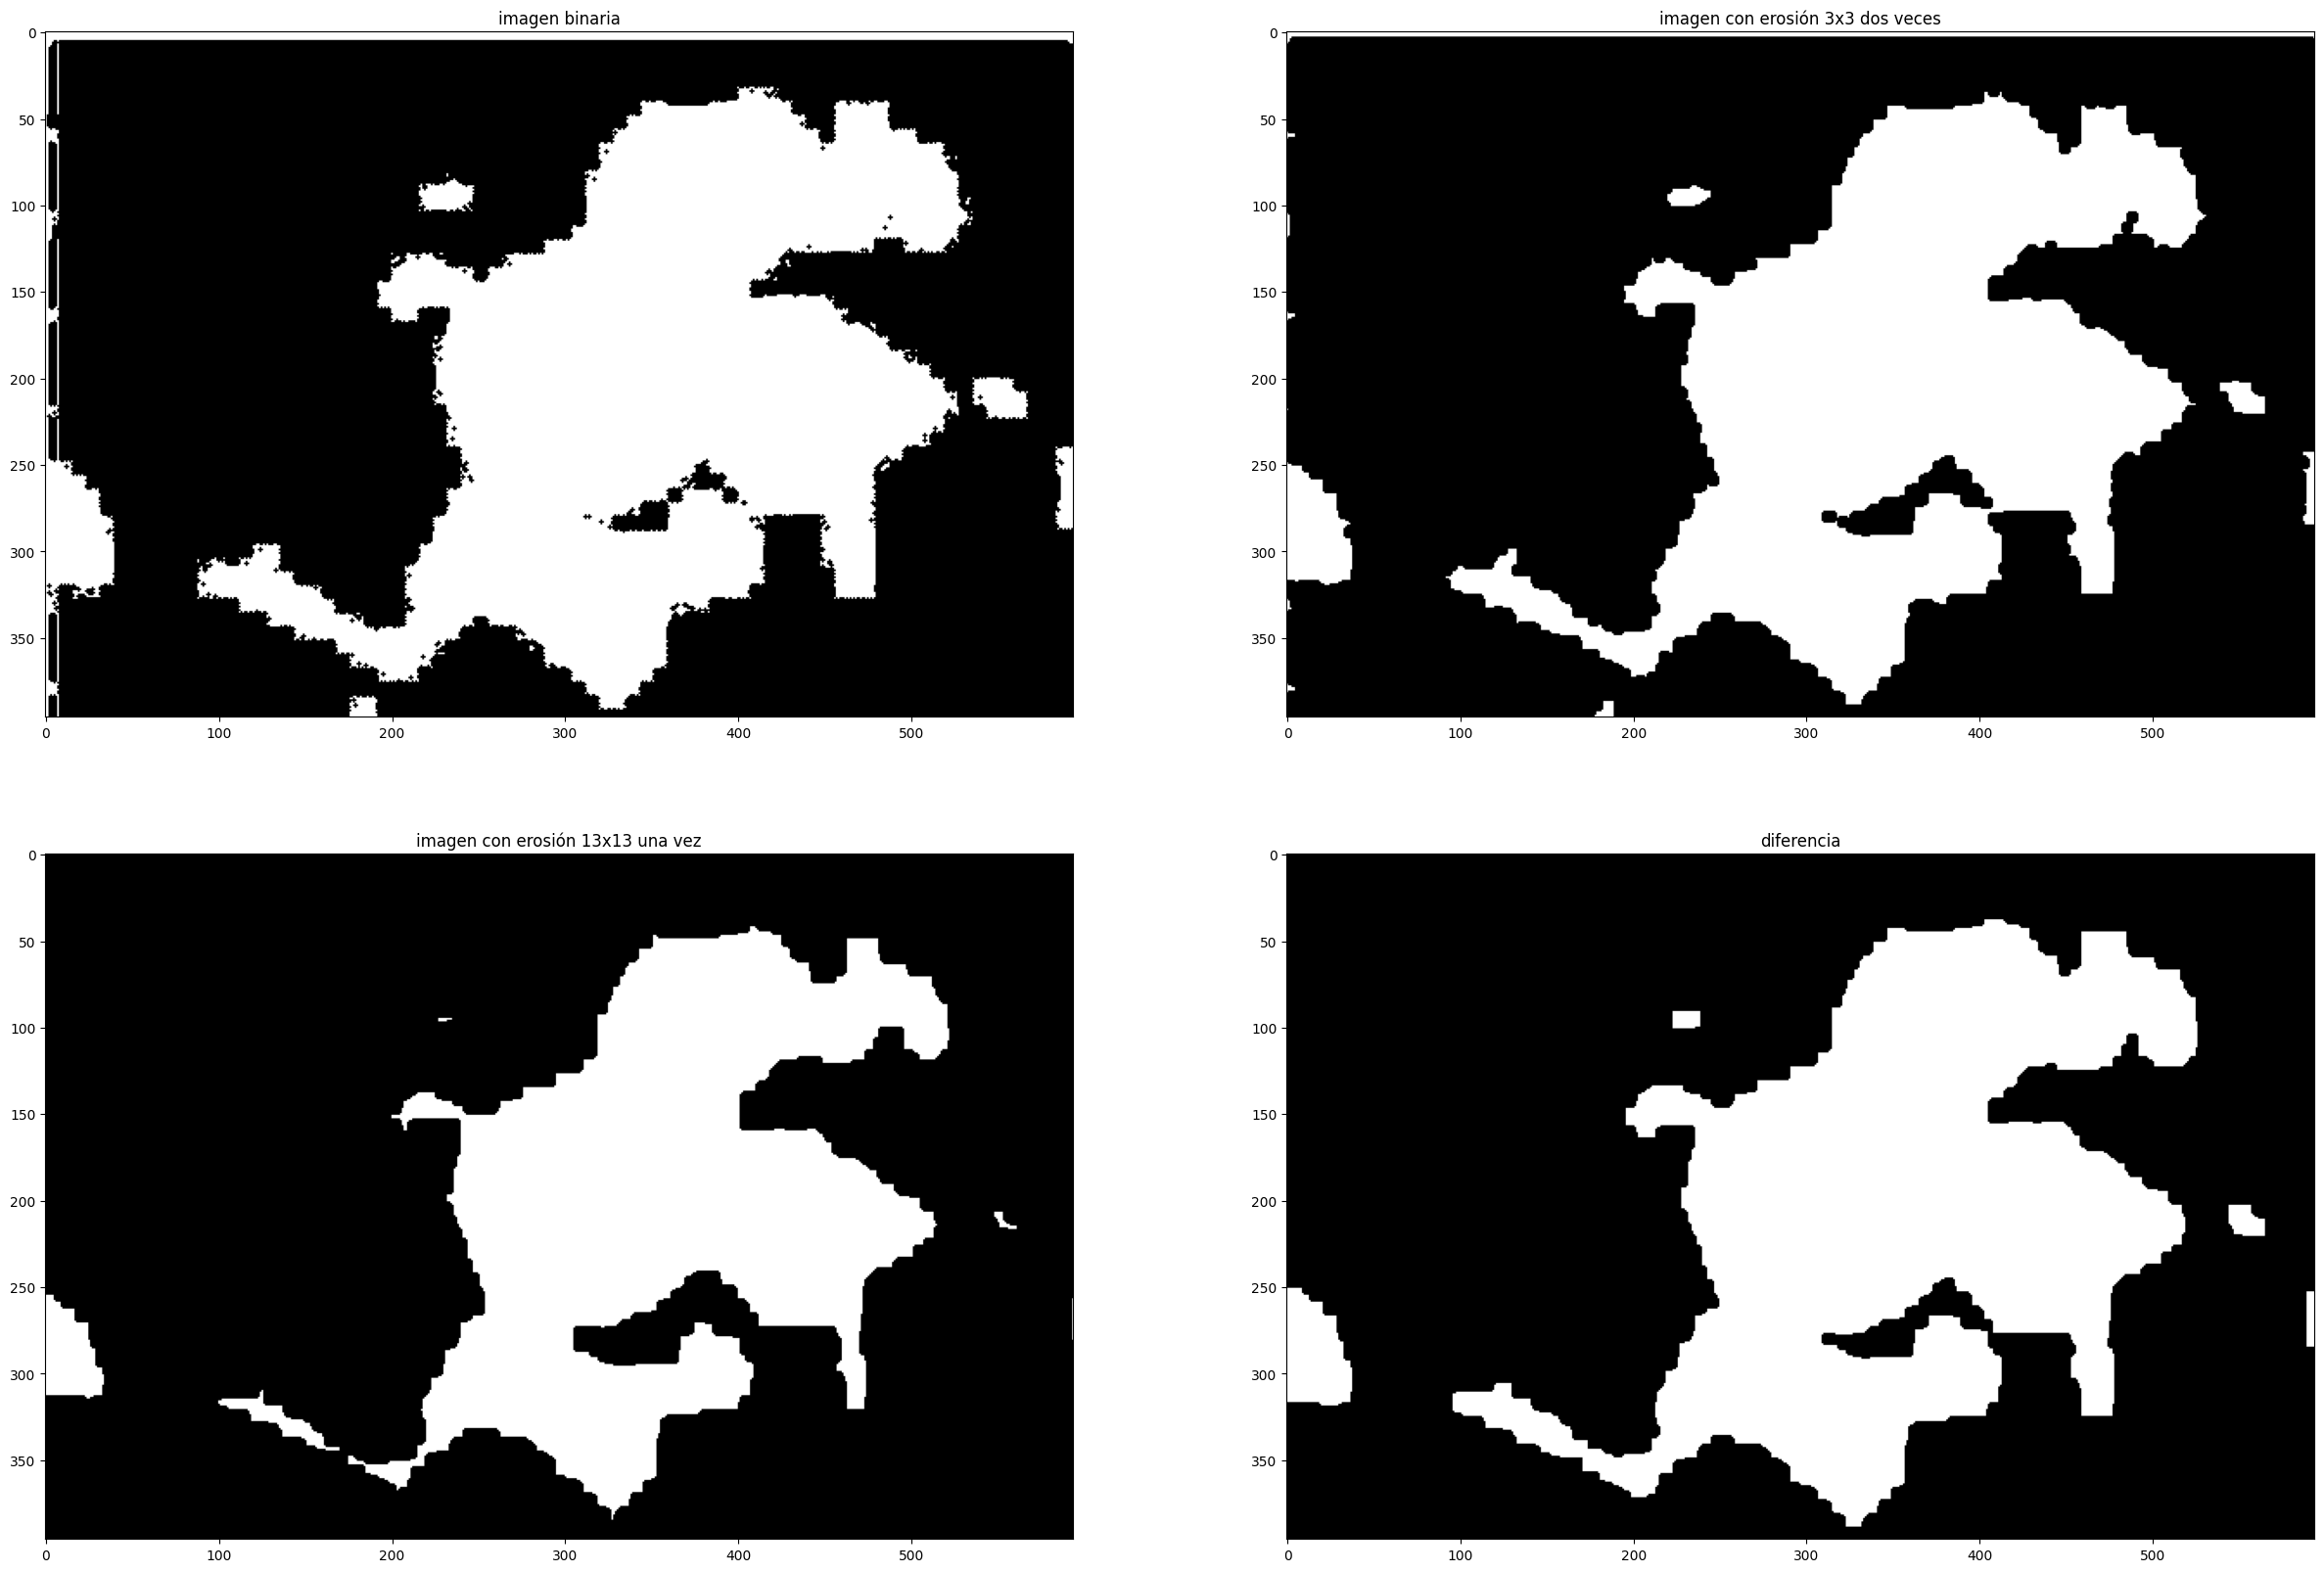

In [120]:
#Importar librerías
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear las máscaras rectangulares de distinto tamaño
selem1 = morph.rectangle(3,3)
selem2 = morph.rectangle(13,13)
selem3 = morph.rectangle(9,9)

#Leer imagen de entrada y binarizarla en una variable nueva
#img = skimage.io.imread('./res/M6/monedas.gif', as_gray=True)
#imgB = img <= 90

#Aplicar erosión acumulativa sobre la imagen de entrada
erosion_once3 = morph.binary_erosion(cierre,selem1)
erosion_double3 = morph.binary_erosion(erosion_once3,selem1)
#Aplicar erosión sobre la imagen binarizada y luego una dilatación bajo las máscaras
#2 y 3 respectivamente
erosion_once13 = morph.binary_erosion(cierre,selem2)
dilatacion = morph.binary_dilation(erosion_once13, selem3)

#Crear un subplot 2x2 que muestre imagen de entrada e imagenes bajo erosiones y dilatación
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(30,20))
ax1.set_title('imagen binaria')

ax1.imshow(cierre, cmap='gray')
ax2.set_title('imagen con erosión 3x3 dos veces')
ax2.imshow(erosion_double3, cmap='gray')
ax3.set_title('imagen con erosión 13x13 una vez')
ax3.imshow(erosion_once13, cmap='gray')
ax4.set_title('diferencia')
ax4.imshow(dilatacion, cmap = 'gray')
#ax4.imshow(np.logical_xor(erosion_once13,erosion_double3), cmap='gray')

### Mascara

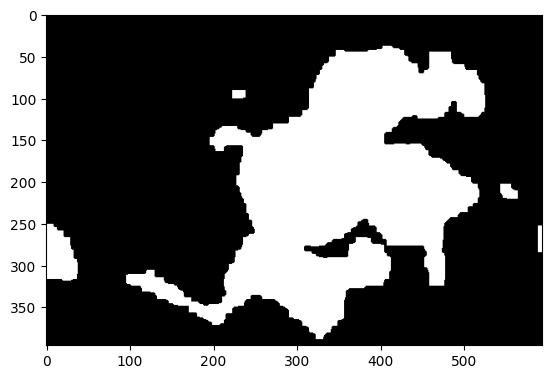

In [122]:
mascara = dilatacion
plt.imshow(mascara, cmap = 'gray')

Use erosion y dilatacion con la mascara. Pero, estos no funcionaron muy bien. Ademas me di cuenta que la mascara sin editar tenia unos bordes bastante lisos gracias a la eliminacion del ruido en pre-procesamiento entonces no era necesario realizar mas modificaciones.
    

## Uso de la Mascara

In [3]:
##Uso de la Mascara##

def use_mask(f):
    ##Uso de la Mascara##
    #Se lee la imagen
    img = cv2.cvtColor(cv2.imread('res/3.jpg'), cv2.COLOR_BGR2RGB)
    #Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
    mascara = cv2.imread(f)/255
    #Ajustar el tamaño de la máscara al de la img
    mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))

    #out = img * np.logical_and(img, np.logical_not(mascara))
    #Aplicar la operación AND sobre la imagen de entrada y la máscara
    out = img * mascara
    out = out/255
    #Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
    ax1.set_title('Imagen de entrada')
    ax2.set_title('Máscara')
    ax3.set_title('Manzanas')
    ax1.imshow(img, cmap='gray')
    ax2.imshow(mascara, cmap='gray')
    ax3.imshow(out, cmap='gray')

    return fig, (ax1,ax2,ax3)

(<Figure size 1500x700 with 3 Axes>,
 (<AxesSubplot:title={'center':'Imagen de entrada'}>,
  <AxesSubplot:title={'center':'Máscara'}>,
  <AxesSubplot:title={'center':'Manzanas'}>))

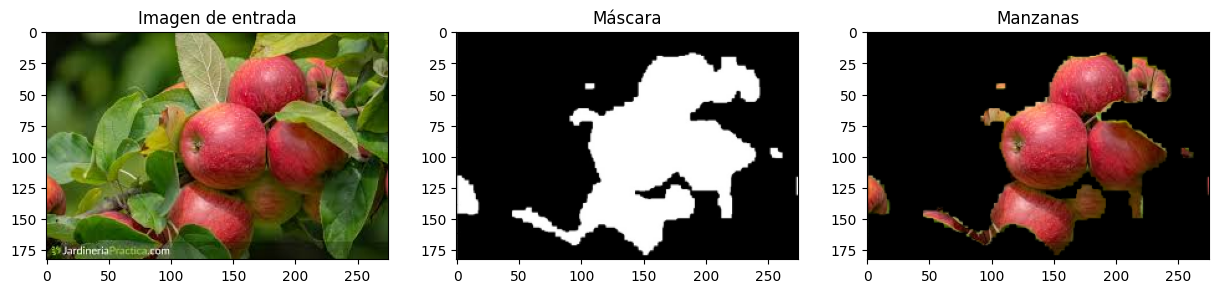

In [4]:
use_mask('res/mascara2.jpg')

(<Figure size 1500x700 with 3 Axes>,
 (<AxesSubplot:title={'center':'Imagen de entrada'}>,
  <AxesSubplot:title={'center':'Máscara'}>,
  <AxesSubplot:title={'center':'Manzanas'}>))

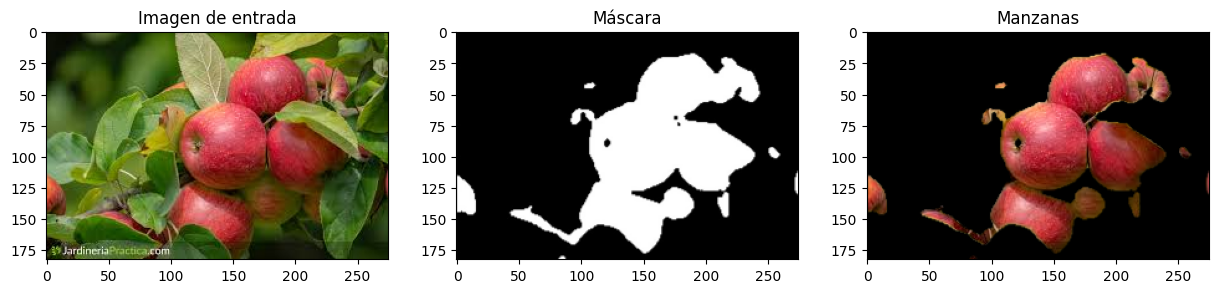

In [5]:
use_mask('res/mascara.jpg')

# Conclusiones 

A lorgo del parcial se realizo la adquision, el pre-procesamiento y la segmentacion de la imagen de manzanas. <br>

### Adquisicion de Imagenes

<li> Primero elegi la imagen, elegi la imagen 3 de las manzanas-. Escogi esta imagen, pues un fondo "homogeneo" permitiria una mejor separacion del objeto de interes. A pesar de que fuera la imagen con menor calidad, esto se podria corregir facilmente en el pre-procesamiento. <br>
<li> Al principio analice los diferentes canales para visualizar en cual se diferenciaban las manzanas. <br>
<li> Cada canal nos proporcionaba informacion diferente, pero el canal que fue de mas utilidad fue el A del LAB que diferencia muy bien las manzanas y el fondo. Es decir, separaba perfectamente los colores rojo y verde.

### Pre- Procesamiento

<li> Como la imagen se veia con un poco de ruido, use una funcion para disminuirlo. 
<li> Analizando el histograma y la imagen, vi que las manzanas eran los colores claros y el fondo colores oscuros.
<li> Realice una expansion y asi, separe un poco mas los colores.   

### Segmentacion

<li> Con los colores separados y un futuro umbral en mente pude continuar con la degmentacion.
<li> Analizando el histograma y la imagen, vi que las manzanas eran los colores claros y el fondo colores oscuros.
<li> Realice una expansion y asi, separe un poco mas los colores. 
<li> Comence probando con diferentes umbrales y como el fondo y los objetos no relevantes estaban bastante oscuros tome un umbral de 110.
<li> Asi, probe diferentes tecnicas de segmentacion y visualice que binarizacion era la mas adecuada.
<li> Trate de realizar erosion y dilatacion con la mascara pero me di cuenta que la mascara sin editar tenia unos bordes bastante lisos gracias a la eliminacion del ruido en pre-procesamiento entonces no era necesario realizar mas modificaciones.
    

### Uso de la Mascara

<li> Finalmente, con el uso de multiplicacion (pues la masccara esta a blanco y negro) se logro separar las manzanas.
<li> Como se pudo ver, la mascara funciono bastante bien, se lograron obtener las manzanas de manera muy limpia.
  